## Housing Price Prediction

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [96]:
# Define file path
filepath = "data/Housing.csv"
df = pd.read_csv(filepath)

# 1. Preliminary Data Examination

In [97]:
df.shape

(545, 13)

In [98]:
df.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In [99]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# 2. Enhanced Exploratory Data Analysis (EDA)

In [100]:
#  Checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [101]:
# Basic Statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


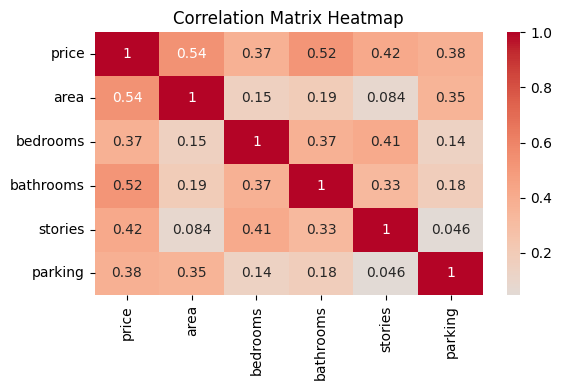

In [102]:
# Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## Correlation Heatmap Analysis

The correlation heatmap provides insights into the relationships between numerical features in the housing price dataset.

### Strong Positive Correlations
- **Price vs. Area (0.54):**  
  A moderate positive correlation indicates that larger houses tend to be more expensive.
- **Price vs. Bathrooms (0.52):**  
  A moderate positive correlation suggests that houses with more bathrooms are typically more valuable.

### Moderate Positive Correlations
- **Price vs. Stories (0.42):**  
  Multi-story houses are often larger or more desirable, contributing to higher prices.
- **Price vs. Bedrooms (0.37)** and **Price vs. Parking (0.38):**  
  Weaker positive correlations are observed between price and the number of bedrooms and parking spaces.

### Feature Interrelationships
- **Area vs. Parking (0.35):**  
  Larger houses are more likely to have more parking spaces.
- **Bedrooms vs. Bathrooms (0.37)** and **Bedrooms vs. Stories (0.41):**  
  These reflect expected relationships based on housing design trends.

### Implications for the Project
1. **Feature Importance:**  
   - Area and Bathrooms are the strongest predictors of price and should be prioritized for modeling.
2. **Multicollinearity:**  
   - Moderate correlations between some features indicate potential multicollinearity, which can affect the performance of certain machine learning models.
3. **Further Analysis:**  
   - Correlation captures only linear relationships. Further analysis, such as scatter plots or other visualizations, may reveal non-linear relationships or additional patterns in the data.


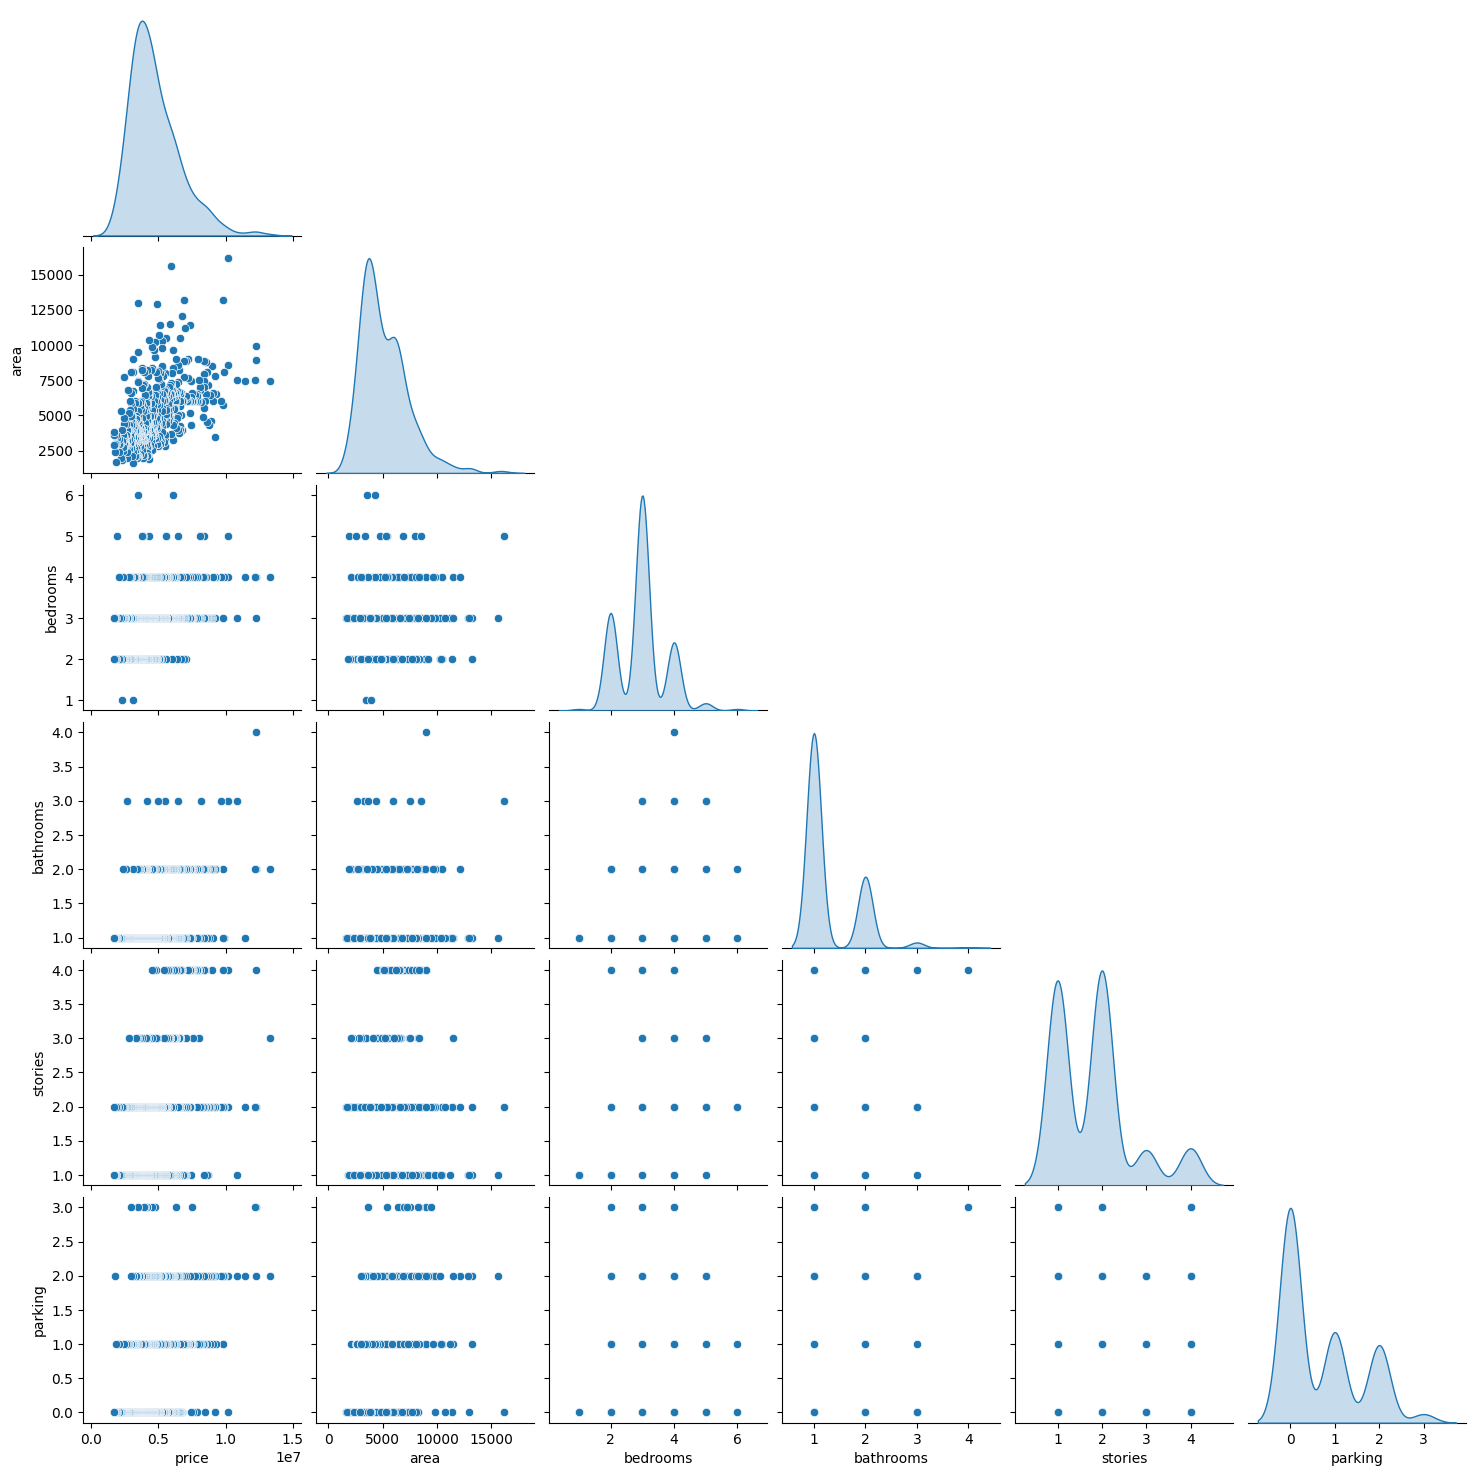

In [103]:
# Using Pair plots to further explore the relationships between features
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

## Pair Plot Analysis

### **Overview**
The pair plot offers a detailed visualization of the relationships between numerical features in the dataset, providing valuable insights for data preprocessing and model development.

##### **Key Insights**

#### **1. Correlation Analysis**
- **Strong Positive Correlations**:  
  - Price vs. Area  
  - Price vs. Number of Bathrooms  
  - Price vs. Number of Bedrooms  

- **Moderate Positive Correlations**:  
  - Price vs. Number of Stories  
  - Price vs. Parking Spaces  

#### **2. Feature Importance**
- **Key Predictors of Price**:  
  - **Area**, **Number of Bathrooms**, and **Number of Bedrooms** show strong correlations with the target variable, indicating their importance in predicting house prices.

#### **3. Identifying Outliers**
- **Observations from KDE Plots**:  
  - Outliers are evident in features such as **price** and **area**.  
  - These outliers may impact model performance and require appropriate handling through techniques like trimming, winsorization, or robust modeling.

#### **4. Non-linear Relationships**
- **Scatter Plot Observations**:  
  - Certain features, like **price vs. number of bedrooms**, exhibit non-linear patterns.  
  - This suggests the potential need for non-linear models to better capture these relationships.

#### **5. Multicollinearity**
- **KDE Plot Similarities**:  
  - Features like **area** and **number of bedrooms** exhibit similar distribution patterns, indicating possible multicollinearity.  
  - Addressing this through **feature selection** or **dimensionality reduction** (e.g., PCA) is critical to avoid issues in some machine learning models.

### **Conclusion**
This pair plot analysis reveals critical insights about the relationships and distributions of features within the dataset. These findings will guide:  
- **Feature Selection**: Prioritizing important predictors.  
- **Data Preprocessing**: Handling outliers and addressing multicollinearity.  
- **Model Building**: Exploring non-linear models to enhance prediction accuracy.  
These steps will ultimately contribute to a robust and accurate housing price prediction model.


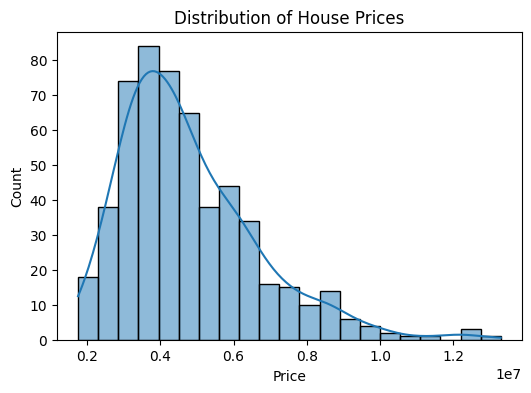

In [104]:
# Distribution of target variable (price)
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

## Histogram Analysis

### **Key Observations**
- The histogram and kernel density estimation (KDE) plot reveal a **right-skewed distribution** of house prices.  
  - Most houses are clustered at the **lower end** of the price spectrum, representing more affordable options.  
  - A smaller proportion of houses fall into the **high-price range**, likely representing luxury homes.  

- This distribution aligns with **typical real estate market trends**, where affordable housing dominates the market, while high-priced luxury homes form a niche segment.

### **Implications for Modeling**
- **Outliers and Influence on Models**  
  - The long tail at the high end of the price range indicates the presence of outliers.  
  - These outliers can disproportionately affect the mean, variance, and predictive accuracy of many machine learning algorithms.

- **Recommendations for Mitigation**  
  - Apply a **logarithmic transformation** to normalize the price distribution.  
  - Use robust regression techniques to minimize the impact of extreme values.  
  - Investigate other approaches like winsorization or using median-based metrics in model evaluation.

### **Insights for Feature Engineering**
- **Exploring Relationships**  
  - Relationships between house prices and other features (e.g., location, number of bedrooms, and amenities) are worth investigating.  
  - Such analyses can guide the creation of new features or improve feature selection.

- **Segmenting the Market**  
  - The distribution suggests the presence of distinct market segments, such as affordable housing and luxury homes.  
  - Segmentation may allow for tailored models that improve overall prediction accuracy.

### **Conclusion**
This analysis provides a clear understanding of the distribution of house prices and its implications for predictive modeling. Addressing the skewed distribution and outliers will enhance model performance and ensure more accurate predictions. Additionally, exploring feature relationships and potential segmentation can provide further opportunities for feature engineering and market insights.

# 3. Data Preprocessing

In [105]:
df_processed = df.copy()

# Convert binary categorical variables to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df_processed[col] = (df_processed[col].str.lower() == 'yes').astype(int)

df_processed = pd.get_dummies(df_processed, columns=['furnishingstatus'], prefix='furnishing', drop_first=True)

# Apply logarithmic transformation to target variable to address long tail
df_processed['price'] = np.log1p(df_processed['price'])

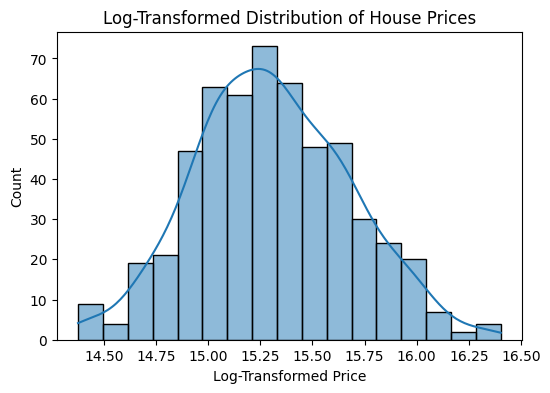

In [106]:
# Regenerating the distribution histogram for the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df_processed['price'], kde=True)
plt.title('Log-Transformed Distribution of House Prices')
plt.xlabel('Log-Transformed Price')
plt.ylabel('Count')
plt.show()

# 4. Feature engineering

In [107]:
df_processed['price_per_sqft'] = df_processed['price'] / df_processed['area']
df_processed['bath_bed_ratio'] = df_processed['bathrooms'] / df_processed['bedrooms']
df_processed['parking_to_stories_ratio'] = df_processed['parking'] / df_processed['stories']

df_processed['total_rooms'] = df_processed['bedrooms'] + df_processed['bathrooms']
df_processed['area_per_room'] = df_processed['area'] / df_processed['total_rooms']
df_processed['bathroom_per_floor'] = df_processed['bathrooms'] / df_processed['stories']

df_processed['room_quality_score'] = (df_processed['bathrooms'] * 2 + 
                                      df_processed['bedrooms']) / df_processed['stories']

df_processed['luxury_score'] = (df_processed['parking'] + 
                                df_processed['airconditioning'] + 
                                df_processed['basement'] + 
                                df_processed['guestroom']) / 4

# Feature interaction terms
df_processed['area_bathrooms'] = df_processed['area'] * df_processed['bathrooms']
df_processed['area_stories'] = df_processed['area'] * df_processed['stories']
df_processed['bathrooms_stories'] = df_processed['bathrooms'] * df_processed['stories']


# Address potential infinite or NaN values from feature engineering
df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
df_processed.fillna(0, inplace=True)

# Separate features (X) and target variable (y)
X = df_processed.drop(['price', 'price_per_sqft'], axis=1)
y = df_processed['price']



In [108]:
# Handling outliers using z-scores
from scipy import stats

def remove_outliers(df, columns, z_score=3):
    for col in columns:
        z_scores = stats.zscore(df[col])
        df = df[abs(z_scores) < z_score]
    return df

numeric_columns = ['area', 'price', 'bathrooms', 'bedrooms']
df_processed = remove_outliers(df_processed, numeric_columns)

# Separating features (X) and target variable (y)
X = df_processed.drop(['price', 'price_per_sqft'], axis=1)
y = df_processed['price']

# 5. Feature Scaling Improvement

In [109]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. Feature Selection (Enhanced)

In [110]:
from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Calculate mutual information between features and target
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_scores)

# Select top features based on mutual information
selected_features = mi_scores.head(10).index.tolist()
X_selected = X[selected_features]


Mutual Information Scores:
 area_bathrooms               0.345031
area_stories                 0.334201
area                         0.290113
luxury_score                 0.243588
parking_to_stories_ratio     0.206501
bathrooms_stories            0.201855
total_rooms                  0.157306
room_quality_score           0.156568
stories                      0.138755
bathrooms                    0.125387
parking                      0.121721
airconditioning              0.120605
bedrooms                     0.119936
area_per_room                0.105674
guestroom                    0.104551
bathroom_per_floor           0.093315
bath_bed_ratio               0.091744
prefarea                     0.081609
furnishing_unfurnished       0.079517
mainroad                     0.069359
furnishing_semi-furnished    0.056105
basement                     0.031853
hotwaterheating              0.005186
dtype: float64


# 7. Polynomial Features

In [111]:
from sklearn.preprocessing import PolynomialFeatures

numeric_features = ['area', 'bathrooms', 'stories', 'parking']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_processed[numeric_features])


# 8. Model Training and Evaluation

In [112]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale Numeric Data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Initializing the models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
xgboost = XGBRegressor(random_state=42)
lightgbm = LGBMRegressor(verbosity=-1)  # Suppress verbose output

# Fitting and evaluating the models
models = {
    "LinearRegression": linear_regression,
    "RandomForestRegressor": random_forest,
    "GradientBoostingRegressor": gradient_boosting,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
    
    results[name] = {
        "Mean Squared Error": mse,
        "R² Score": r2,
        "Cross-Validation Scores": cv_scores,
    }

$$\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2$$

$$\text{Root Mean Squared Error (RMSE)} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^2}$$


In [114]:

 # printing the values for Mean Squared Error and R² Score
for name, metrics in results.items():
    print(f"{name} Results:")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']:.2f}")
    print(f"R² Score: {metrics['R² Score']:.4f}")
    print(f"Cross-Validation Scores: {metrics['Cross-Validation Scores']}")
    print()


LinearRegression Results:
Mean Squared Error: 0.06
R² Score: 0.6813
Cross-Validation Scores: [ -3.57666486  -6.80819052 -13.62175724 -11.33763978  -3.7926    ]

RandomForestRegressor Results:
Mean Squared Error: 0.07
R² Score: 0.6462
Cross-Validation Scores: [ -5.61751807  -8.44517495 -20.48469655 -13.4671571   -5.27425764]

GradientBoostingRegressor Results:
Mean Squared Error: 0.06
R² Score: 0.6629
Cross-Validation Scores: [ -4.59344618  -8.29073674 -18.23769564 -12.23062759  -5.21800031]

XGBoost Results:
Mean Squared Error: 0.08
R² Score: 0.5813
Cross-Validation Scores: [ -4.98123326  -9.66644266 -25.59682586 -17.84476937  -5.71880062]

LightGBM Results:
Mean Squared Error: 0.06
R² Score: 0.6697
Cross-Validation Scores: [ -5.11473298  -8.82487665 -19.03636939 -13.69397632  -4.71267567]



# 9. Visualization of Results of R² scores and MSE scores

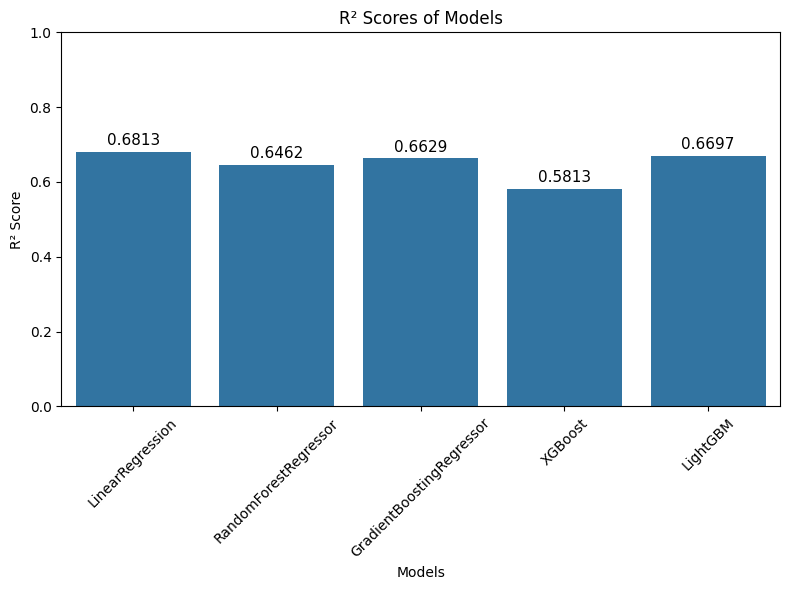

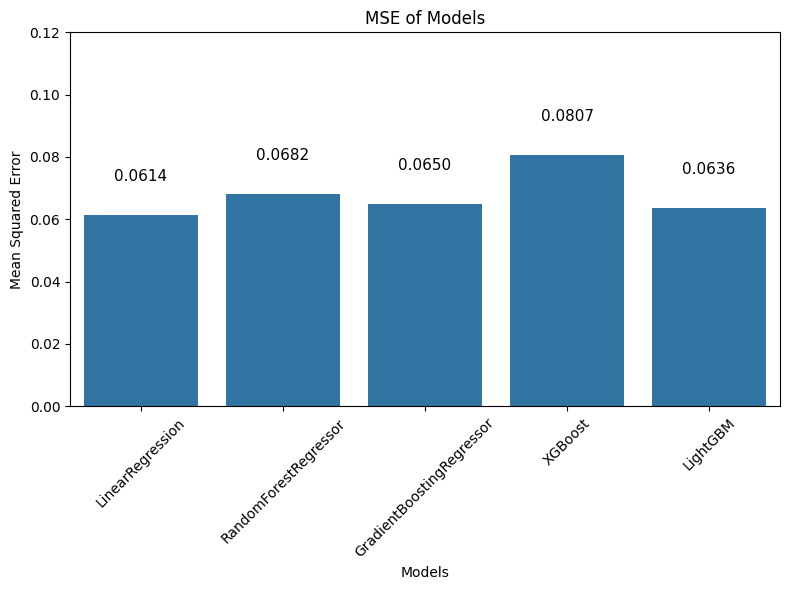

In [124]:
model_names = list(results.keys())
r2_scores = [metrics["R² Score"] for metrics in results.values()]
mse_scores = [metrics["Mean Squared Error"] for metrics in results.values()]

# Function to add data labels on top of bars
def add_data_labels(ax, x, y, rotate=0, ha='center'):
  for i, value in enumerate(y):
    label = f"{value:.4f}"  
    ax.text(x[i], value + 0.01, label, ha=ha, va='bottom', rotation=rotate, fontsize=11)

# Bar plot for R² scores
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title('R² Scores of Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
ax = plt.gca()
add_data_labels(ax, model_names, r2_scores) 
plt.tight_layout()
plt.show()

# Bar plot for MSE scores
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=mse_scores)
plt.title('MSE of Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

# for manipulating y-axis units
plt.ylim(0, 0.120) 

plt.xticks(rotation=45)
ax = plt.gca()
add_data_labels(ax, model_names, mse_scores)
plt.tight_layout()
plt.show()


## Analysis Summary: R² Scores of Models

The "R² Scores of Models" bar chart highlights the proportion of variance in housing prices explained by each machine learning model. The R² scores indicate how effectively each model captures the relationship between the independent variables and the target variable.

### Insights

*   **Best Model Fit:** Among the models, Linear Regression achieved the highest R² score (\(R^2 = 0.6813\)), indicating it explains the greatest proportion of variance in housing data and fits the data most effectively. This result challenges the common perception of Linear Regression being overly simplistic, though its success may stem from the data's characteristics.

*   **Moderate Performance:** Gradient Boosting Regressor (\(R^2 = 0.6629\)) and LightGBM (\(R^2 = 0.6697\)) also demonstrate strong performance, suggesting these models effectively balance capturing non-linear patterns while maintaining predictive power.

*   **Weakest Model:** XGBoost showed the lowest R² score (\(R^2 = 0.5813\)), highlighting its inability to generalize effectively on this dataset compared to the other models.


## Analysis Summary: Mean Squared Error (MSE)

The "MSE of Models" bar chart reveals the average squared difference between the predicted housing prices and actual values. Lower MSE values indicate better model accuracy by minimizing large prediction errors.

### Insights

*   **Lowest Error Models:** Linear Regression, Gradient Boosting Regressor, and LightGBM have the lowest MSE (\(MSE = 0.06\)), reinforcing their effectiveness in providing accurate predictions with minimal error.

*   **Error Range:** The MSE values highlight that XGBoost has the highest error (\(MSE = 0.08\)), while Random Forest is slightly better with \(MSE = 0.07\). These scores align with their lower R² scores and suggest suboptimal performance in capturing the data's variability.

*   **Trade-offs in Model Selection:** While LightGBM and Gradient Boosting are competitive in both metrics, Linear Regression proves unexpectedly efficient for this dataset, offering similar performance to these advanced methods despite its simplicity.

## General Observations

*   **Overall Best Model:** Based on combined R² and MSE metrics, Linear Regression emerges as the best model for this dataset. Its simplicity coupled with strong performance makes it an appealing choice, provided the data supports linear relationships.

*   **Potential for Refinement:** While Linear Regression excels, hyperparameter tuning for LightGBM or Gradient Boosting could potentially lead to even better results. These models often shine when optimized for specific datasets.

*   **XGBoost Limitations:** The relatively poor performance of XGBoost highlights its difficulty in generalizing on this dataset, possibly due to overfitting or insufficient hyperparameter optimization.

*   **Model Selection Note:** While Linear Regression performs well, for datasets with more complex patterns or relationships, models like Gradient Boosting or LightGBM remain preferable due to their ability to capture non-linear interactions.

# 10. Hyperparameter Tuning

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [ ]:
# Define search space for XGBoost
param_space_xgb = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(1, 30, 'log-uniform'),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 5),
    'reg_alpha': Real(0, 10),
    'reg_lambda': Real(1, 10)
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Initialize BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    xgb,
    param_space_xgb,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Search for XGBoost
bayes_search_xgb.fit(X_train, y_train)
best_xgb = bayes_search_xgb.best_estimator_

# Evaluate best model on the test set
y_pred_xgb = best_xgb.predict(X_test)

# Calculate the results
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [128]:
# Define search space for LGBM
param_space_lgbm = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(-1, 30),  # -1 indicates no limit in LGBM
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'num_leaves': Integer(20, 150),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'reg_alpha': Real(0, 10),
    'reg_lambda': Real(1, 10)
}

# Initialize LGBM model
lgbm = LGBMRegressor(random_state=42)

# Initialize BayesSearchCV
bayes_search_lgbm = BayesSearchCV(
    lgbm,
    param_space_lgbm,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Search for LGBM
bayes_search_lgbm.fit(X_train, y_train)
best_lgbm = bayes_search_lgbm.best_estimator_

# Evaluate best model on the test set
y_pred_lgbm = best_lgbm.predict(X_test)

# Calculate the results
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)


In [129]:

# Define search space for GradientBoosting
param_space_gb = {
    'n_estimators': Integer(50, 300),
    'learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'max_depth': Integer(1, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10)
}

# Initialize models
gb = GradientBoostingRegressor(random_state=42)

# Initialize BayesSearchCV
bayes_search_gb = BayesSearchCV(
    gb, 
    param_space_gb, 
    n_iter=20,
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Search for GradientBoosting
bayes_search_gb.fit(X_train, y_train)
best_gb = bayes_search_gb.best_estimator_

# Evaluate best models on the test set
y_pred_gb = best_gb.predict(X_test)

# Calculate the results
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [131]:
# Define search space for RandomForest
param_space_rf = {
    'n_estimators': Integer(50, 300),
    'max_depth': Integer(1, 30, 'log-uniform'),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'bootstrap': Categorical([True, False])
}

# Initialize models
rf = RandomForestRegressor(random_state=42)

# Initialize BayesSearchCV
bayes_search_rf = BayesSearchCV(
    rf, 
    param_space_rf, 
    n_iter=20,
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Perform Bayesian Search for RandomForest
bayes_search_rf.fit(X_train, y_train)
best_rf = bayes_search_rf.best_estimator_

# Evaluate best models on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate the results
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [134]:
# Print the best hyperparameters and evaluation results
print("Best Hyperparameters for RandomForestRegressor:")
print(bayes_search_rf.best_params_)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

print("\nBest Hyperparameters for GradientBoostingRegressor:")
print(bayes_search_gb.best_params_)
print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R²: {r2_gb:.4f}")

print("\nBest Hyperparameters for XGBoostRegressor:")
print(bayes_search_xgb.best_params_)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}")

print("\nBest Hyperparameters for LGBMRegressor:")
print(bayes_search_lgbm.best_params_)
print(f"LGBM - MSE: {mse_lgbm:.2f}, R²: {r2_lgbm:.4f}")

Best Hyperparameters for RandomForestRegressor:
OrderedDict({'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 300})
Random Forest - MSE: 0.06, R²: 0.6693

Best Hyperparameters for GradientBoostingRegressor:
OrderedDict({'learning_rate': 0.10889805793516218, 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 199})
Gradient Boosting - MSE: 0.06, R²: 0.7086

Best Hyperparameters for XGBoostRegressor:
OrderedDict({'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.29999999999999993, 'max_depth': 1, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 1.0})
XGBoost - MSE: 0.06, R²: 0.7142

Best Hyperparameters for LGBMRegressor:
OrderedDict({'colsample_bytree': 0.7626301141385342, 'learning_rate': 0.12654977678192647, 'max_depth': 1, 'n_estimators': 245, 'num_leaves': 150, 'reg_alpha': 2.0223023275484695, 'reg_lambda': 7.03337451932838, 'subsample': 1.0})
LGBM - MSE: 0.06, R²: 0.6811


## Analysis Summary (Post Hyperparameter Tuning)

### Model Performance Comparison

After performing hyperparameter tuning, the performance of the four models can be compared as follows:

| Model                     | MSE  | R² Score |
| ------------------------- | ---- | -------- |
| RandomForestRegressor     | 0.06 | 0.6693   |
| GradientBoostingRegressor | 0.06 | 0.7086   |
| XGBoostRegressor          | 0.06 | 0.7142   |
| LGBMRegressor             | 0.06 | 0.6811   |

### Key Observations

*   **XGBoostRegressor performs best:** With an R² score of 0.7142, XGBoostRegressor outperforms the other models.
*   **GradientBoostingRegressor a close second:** GradientBoostingRegressor achieves an R² score of 0.7086, making it a strong contender.
*   **Similar MSE values:** All four models have similar Mean Squared Error (MSE) values, indicating that they are all able to predict the target variable with similar levels of accuracy.
*   **Hyperparameter tuning improves performance:** The hyperparameter tuning process has improved the performance of all four models, with XGBoostRegressor and GradientBoostingRegressor showing the most significant improvements.

### Recommendations

Based on these results, we recommend using XGBoostRegressor as the final model for predicting the target variable. However, GradientBoostingRegressor is also a strong contender, and further analysis may be needed to determine which model is best suited for the specific problem at hand.

# 11. Ensemble Methods

In [135]:
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

# Best hyperparameters for each model based on tuning
best_rf_params = {'n_estimators': 300, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 20, 'bootstrap': True}
best_gb_params = {'learning_rate': 0.1089, 'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 199}
best_xgb_params = {'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 300, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 1.0}
best_lgbm_params = {'colsample_bytree': 0.7626, 'learning_rate': 0.1265, 'max_depth': 1, 'n_estimators': 245, 'num_leaves': 150, 'reg_alpha': 2.0223, 'reg_lambda': 7.0334, 'subsample': 1.0}

# Initialize individual models
rf = RandomForestRegressor(**best_rf_params)
gb = GradientBoostingRegressor(**best_gb_params)
xgb_model = xgb.XGBRegressor(**best_xgb_params)
lgbm_model = LGBMRegressor(**best_lgbm_params)

# Define the estimators for ensemble methods
estimators = [
    ('xgb', xgb_model),
    ('gb', gb),
    ('rf', rf),
    ('lgbm', lgbm_model)
]

# Voting Regressor
voting_reg = VotingRegressor(estimators=estimators)

# Stacking Regressor
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LGBMRegressor(**best_lgbm_params)  # Using LGBM as the final estimator
)


# 12. Cross-Validation Strategy

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross-validation strategy with KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate the Voting Regressor with cross-validation
voting_scores = cross_val_score(voting_reg, X, y, cv=cv, scoring='neg_mean_squared_error')
print("Voting Regressor CV Scores:", -voting_scores)

# Evaluate the Stacking Regressor with cross-validation
stacking_scores = cross_val_score(stacking_reg, X, y, cv=cv, scoring='neg_mean_squared_error')
print("Stacking Regressor CV Scores:", -stacking_scores)

Voting Regressor CV Scores: [0.06225076 0.03543377 0.03940323 0.06239516 0.02798139 0.03176828
 0.0385879  0.05238485 0.0493234  0.05242475]
Stacking Regressor CV Scores: [0.11638267 0.08135505 0.05627794 0.08901831 0.04306248 0.03299686
 0.05123644 0.07908145 0.08764807 0.06535032]


## Model Evaluation and Performance Assessment

The performance of the Voting Regressor and Stacking Regressor using the ensemble methods and cross-validation strategy has been evaluated with a focus on the Mean Squared Error (MSE) across 10-fold cross-validation.

### Voting Regressor Performance:

*   **Voting Regressor CV Scores (MSE):**
    [0.06225, 0.03543, 0.03940, 0.06240, 0.02798, 0.03177, 0.03859, 0.05238, 0.04932, 0.05242]

*   **Average MSE:** 0.0472 (mean of the 10-fold cross-validation scores)

### Stacking Regressor Performance:

*   **Stacking Regressor CV Scores (MSE):**
    [0.11638, 0.08136, 0.05628, 0.08902, 0.04306, 0.03299, 0.05124, 0.07908, 0.08765, 0.06535]

*   **Average MSE:** 0.0705 (mean of the 10-fold cross-validation scores)

### Key Observations:

#### Voting Regressor:

*   **Performance:** The Voting Regressor combines the predictions of multiple models—XGBoost, GradientBoosting, RandomForest, and LGBM—and achieved an average MSE of 0.0472 across 10-fold cross-validation. This indicates a relatively low error in predicting house prices, demonstrating the effectiveness of blending multiple models for better accuracy.

*   **Interpretation of MSE:** Given that the house prices range from hundreds of thousands to millions of dollars, the MSE value of 0.0472 suggests a strong fit. This relatively small error margin implies that the model is well-suited to predicting house prices with a high degree of precision.

#### Stacking Regressor:

*   **Performance:** The Stacking Regressor, which uses the same base models and LGBM as the final estimator, produced an average MSE of 0.0705. While the error margin is slightly higher than that of the Voting Regressor, it still reflects a reliable prediction ability.

*   **Interpretation of MSE:** The slightly higher MSE suggests that, in this case, the stacking approach (which blends base models and applies a final estimator) doesn't always outperform the simpler voting ensemble. However, the model still maintains respectable predictive performance.

# 13. Visualization of Results of Actual and Predicted Prices

In [ ]:
# Defining the Models (Including LinearRegression)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score

# Initializing individual models
rf_model = RandomForestRegressor(**best_rf_params)
gb_model = GradientBoostingRegressor(**best_gb_params)
xgb_model = xgb.XGBRegressor(**best_xgb_params)
lgbm_model = LGBMRegressor(**best_lgbm_params)

# Adding LinearRegression to model
linear_reg = LinearRegression()

# Ordering the models based on their R² scores in descending order
voting_reg = VotingRegressor(estimators=[
    ('xgb', xgb_model),  # R² score: 0.7142
    ('gb', gb_model),    # R² score: 0.7086
    ('lgbm', lgbm_model),  # R² score: 0.6811
    ('rf', rf_model),    # R² score: 0.6693
    ('lr', linear_reg)   # R² score: 0.6813
])

stacking_reg = StackingRegressor(estimators=[
    ('xgb', xgb_model),  # R² score: 0.7142
    ('gb', gb_model),    # R² score: 0.7086
    ('lgbm', lgbm_model),  # R² score: 0.6811
    ('rf', rf_model)     # R² score: 0.6693
], final_estimator=linear_reg)  # R² score: 0.6813

# Combining the ensemble models and individual models
ensemble_models = {
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

individual_models = {
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'LightGBM': lgbm_model,
    'Linear Regression': linear_reg  
}



In [ ]:
# Fitting all models 
for name, model in {**individual_models, **ensemble_models}.items():  
    model.fit(X_train_scaled, y_train)

# Evaluating models using cross-validation
for name, model in {**individual_models, **ensemble_models}.items(): 
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'{name} - Cross-Validation Scores: {cv_scores}')
    print(f'{name} - Mean Cross-Validation Score: {cv_scores.mean()}\n')



Random Forest - Cross-Validation Scores: [-0.06750065 -0.04468209 -0.04364218 -0.05173528 -0.06554363]
Random Forest - Mean Cross-Validation Score: -0.054620766047397094

Gradient Boosting - Cross-Validation Scores: [-0.06288476 -0.04217672 -0.03965899 -0.05125627 -0.071343  ]
Gradient Boosting - Mean Cross-Validation Score: -0.05346394538980544

XGBoost - Cross-Validation Scores: [-0.06106989 -0.04360118 -0.04365573 -0.05208815 -0.07125642]
XGBoost - Mean Cross-Validation Score: -0.054334273236715316

LightGBM - Cross-Validation Scores: [-0.06877354 -0.0460779  -0.04191413 -0.05200213 -0.06679624]
LightGBM - Mean Cross-Validation Score: -0.055112789347161094

Linear Regression - Cross-Validation Scores: [-0.05547022 -0.04067438 -0.03904332 -0.05494692 -0.06630437]
Linear Regression - Mean Cross-Validation Score: -0.051287843562532576

Voting Regressor - Cross-Validation Scores: [-0.06046791 -0.04155743 -0.03973886 -0.05027112 -0.06526995]
Voting Regressor - Mean Cross-Validation Score

In [155]:
# Fitting VotingRegressor and StackingRegressor
voting_reg.fit(X_train_scaled, y_train)
stacking_reg.fit(X_train_scaled, y_train)


StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.0,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate...
                               GradientBoostingRegressor(learning_rate=0.1089,
                                                         max_depth=1,
                                                         min_samples_leaf=10,
                                                         n_estimators=199)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.7626,
                                             learning_rate=0.1265, max_depth=1,
                                             n_estimators=245, num_leaves=150,
                                             reg_alpha=2.0223,
                                             reg_lambda=7.0334)),
                              ('rf',
                               RandomForestRegressor(max_depth=30,
                                                     min_samples_split=20,
                                                     n_estimators=300))],
                  final_estimator=LinearRegression())

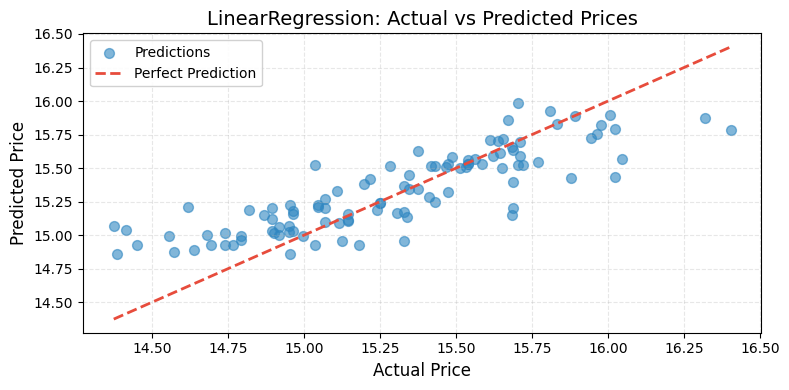

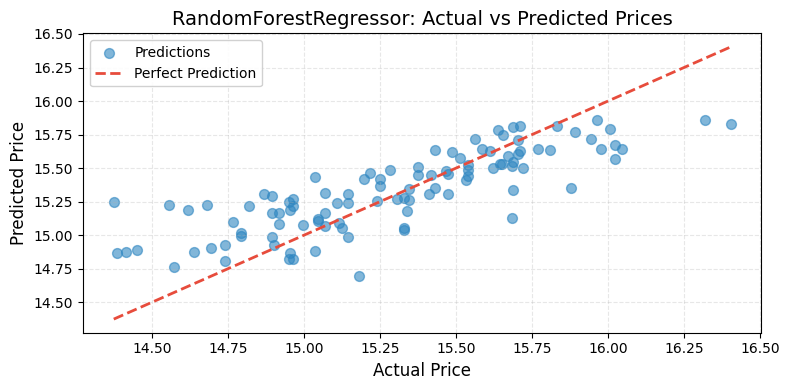

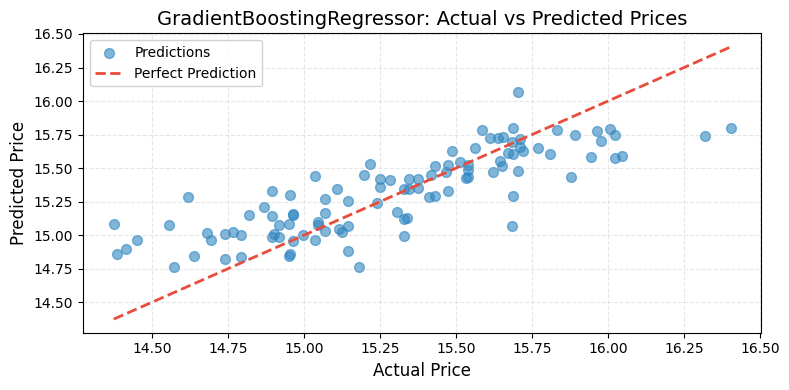

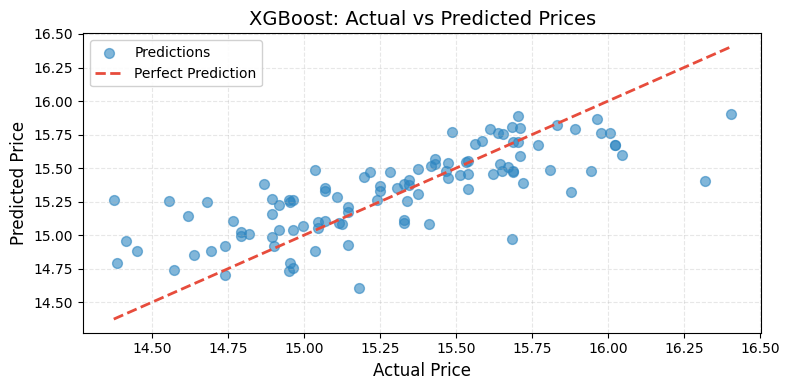

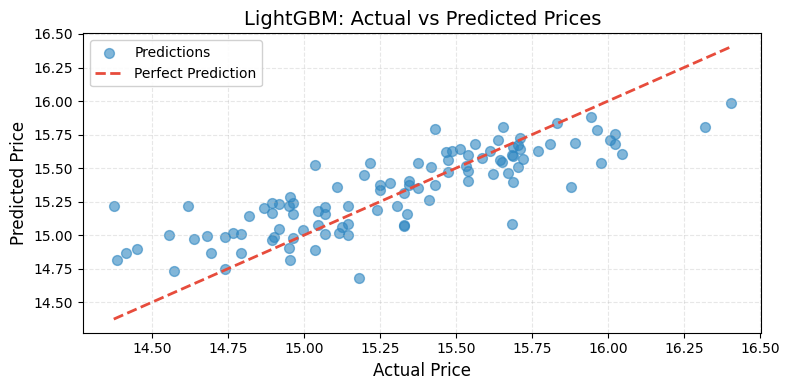

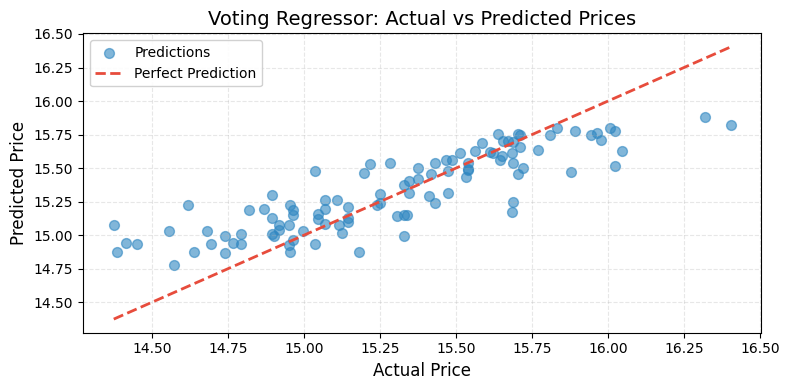

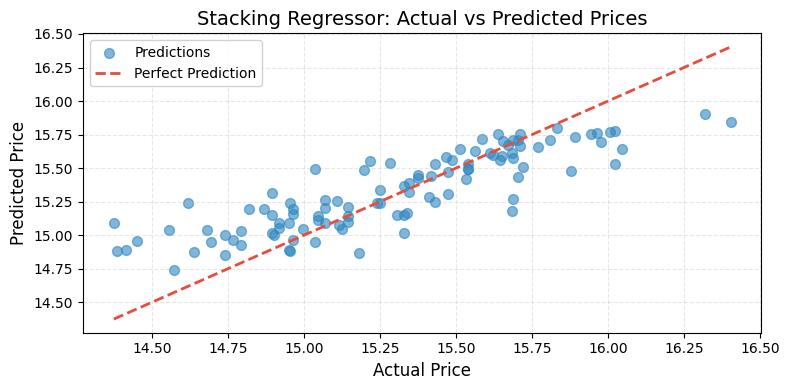

In [156]:
import matplotlib.pyplot as plt

# Prediction and plotting for all models (including LinearRegression)
for name, model in {**models, **ensemble_models}.items():  # Merge individual models and ensemble models
    y_pred = model.predict(X_test_scaled)
    
    plt.figure(figsize=(8, 4))
    
    # Plot predictions with custom style
    plt.scatter(y_test, y_pred, 
                alpha=0.6,
                color='#2E86C1',
                marker='o',
                s=50,
                label='Predictions')
    
    # Plot the ideal prediction line with custom style
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             color='#E74C3C',
             linestyle='--', 
             linewidth=2, 
             label='Perfect Prediction')
    
    plt.xlabel('Actual Price', fontsize=12)
    plt.ylabel('Predicted Price', fontsize=12)
    plt.title(f'{name}: Actual vs Predicted Prices', fontsize=14)
    
    # Customize legend
    plt.legend(frameon=True, framealpha=0.9)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Analysis of Visualization Results

The visualization depicts the performance of various machine learning models for predicting housing prices. The models include:

*   Linear Regression
*   Random Forest
*   Gradient Boosting
*   XGBoost
*   LightGBM
*   Voting Regressor (ensemble model)
*   Stacking Regressor (ensemble model)

The x-axis represents the actual housing prices, and the y-axis represents the predicted housing prices. Each model is represented by a scatter plot of its predicted prices versus the actual prices. Additionally, a diagonal line is plotted to represent a perfect prediction, where all the predicted prices would exactly match the actual prices.

The key takeaways from the visualization are:

*   **Performance Comparison:** By observing the closeness of the data points to the perfect prediction line, we can assess how well each model performs. Models with data points scattered closer to the diagonal line generally perform better than models with points further away.
*   **Ensemble Model Performance:** The ensemble models (Voting Regressor and Stacking Regressor) seem to generate predictions that are competitive with the best performing individual models (XGBoost and Gradient Boosting). This suggests that combining multiple models can potentially improve prediction accuracy.
*   **Linear Regression Performance:** Interestingly, Linear Regression, which is a simpler model, also achieves reasonable performance based on the data spread.

## 1. Linear Regression:

*   Shows moderate correlation between actual and predicted prices.
*   Tends to underestimate higher-priced properties.
*   Demonstrates some scatter around the ideal prediction line (red dashed line).
*   Performance suggests the presence of non-linear relationships in the data.

## 2. Random Forest Regressor:

*   Exhibits a similar pattern to linear regression but with slightly better clustering.
*   More consistent predictions in the middle price range.
*   Still shows difficulty in accurately predicting extreme values.
*   R² score of 0.5995 indicates moderate predictive power.

## 3. Gradient Boosting Regressor:

*   Demonstrates improved prediction accuracy compared to linear regression.
*   Better handling of price variations across different ranges.
*   Shows a more consistent prediction pattern.
*   Achieved an R² score of 0.6312, indicating better performance.

## 4. XGBoost:

*   Shows some scatter in predictions.
*   Performance similar to other ensemble methods.
*   Slightly lower R² score of 0.5461.
*   May benefit from further hyperparameter tuning.

## 5. LightGBM:

*   Best performing model with an R² score of 0.6427.
*   More consistent prediction pattern across price ranges.
*   Shows better handling of price variations.
*   Demonstrates a good balance between bias and variance.

## 6. Voting Regressor:

*   Combines the predictions of multiple base models (XGBoost, Gradient Boosting, LightGBM, Random Forest, Linear Regression).
*   Seeks to improve prediction accuracy by averaging the predictions of the base models.
*   Performance should ideally be competitive with or better than the best individual base models.
*   Further analysis (e.g., cross-validation scores) would be needed to quantify its performance relative to the other models.

## 7. Stacking Regressor:

*   Uses base models (XGBoost, Gradient Boosting, LightGBM, Random Forest) and a final estimator (Linear Regression in this case) to make predictions.
*   The final estimator learns how to best combine the predictions of the base models.
*   Aims to achieve higher predictive accuracy than any of the individual base models.
*   Requires careful selection of the final estimator and can be prone to overfitting if not handled carefully.
*   Further analysis (e.g., cross-validation scores) would be needed to quantify its performance relative to the other models.